# Project: Wrangling and Analyze Data

## Data Gathering
In the cells below, I gather **all** three pieces of data for this project and load them in the notebook. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import requests as re
import os
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Read the twitter-archive file
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Observe the archive data
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. I use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = re.get(url)

# Save HTML to file

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)
    
    

In [5]:
# Read the file
images = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
# Observe the images data
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


The twitter API is queried using tweepy

In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1406: 699323444782047232
Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439:

Fail
1680: 682032003584274432
Fail
1681: 682003177596559360
Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713:

Fail
1954: 673662677122719744
Fail
1955: 673656262056419329
Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987:

Fail
2228: 668268907921326080
Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261:

3. I open the tweet_json.txt file and read it line by line because I could not get access to the Twitter API.

In [8]:
tweet_json = []

In [9]:
with open('tweet-json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        tweet_json.append(data)

In [10]:
#list all the keys in the dictionary
list(tweet_json[0].keys())

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang']

In [11]:
# pick id, retweet_count, favorite_count from the tweets json file and turns it to a DataFrame
tweets = pd.DataFrame(tweet_json, columns = ['id', 'retweet_count', 'favorite_count'])

## Assessing Data
Here, I assess the data in order to detect and document at least **eight (8) quality issues and two (2) tidiness issue**, using visual and programmatic assessment.




In [12]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Above I visually assess the archive dataframe to get a feel of the data, I look at the column headers as well as the data it contains and I can identify some issues such as lots of NaN values in some columns. It would be interesting to see the number of non NaN values in these columns. There are several None values in the name, doggo, floofer, pooper, puppo which should probably be NaN and there are also several odd looking names like a, an, the and so on. It also seems it would be better to collapse the doggo, floofer, pooper and puppo into one column.

In [13]:
tweets

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


Above I visually assess the tweets dataframe to get a feel for the data, I look at the column headers as well as the data it contains and I can't really spot any quality issues; only that the favorite count and the retweet count would be better represented if it is available on the archive table.

In [14]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Above I visually assess the images dataframe to get a feel for the data, I look at the column headers as well as the data it contains and I think that the column headers for could be better represented; for example p1 could be dog_breed_p1. I also observe that the p2 and p3 dog breeds have much lower confidence than p1, so it might not hurt for me to drop those columns. I also observe that some of the dog breeds start with capital letters while others start with small letters, the dog breed might also be better represented if it appears on the archive table.

In [15]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Above, I programmatically inspect the archive table and I observe that there are five columns that have missing data points:
in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp. These all represent retweets and retweets are not to be considered, so they might have to be removed. Tweet_id might also be better as a string and timestamp as timedate.

In [16]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Above, I programmatically inspect the images table and apart from perhaps that the tweet_id might be better as a string and some of the columns could have more descriptive names, I don't really see any issues.

In [17]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


Above, I programmatically inspect the tweets table and apart from perhaps that the id might be better as a string, I don't really see any issues.

In [18]:
#Counts all the names and it is observed that the name None has 745 counts
archive.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
Sadie           8
the             8
Toby            7
an              7
Bailey          7
Daisy           7
Buddy           7
Stanley         6
Koda            6
Milo            6
Oscar           6
Bella           6
Rusty           6
Jack            6
Leo             6
Scout           6
Jax             6
Dave            6
Louis           5
             ... 
Godzilla        1
Mingus          1
Boots           1
Dunkin          1
Dylan           1
Bradley         1
Corey           1
Bobble          1
Chesterson      1
Jett            1
Gin             1
Ridley          1
Kollin          1
Jebberson       1
Kendall         1
Chuq            1
Rizzo           1
Joshwa          1
Fynn            1
Rodney          1
Aiden           1
Snicku          1
old             1
Aubie           1
Jomathan  

Above I programmatically dial in on the names and I observe that there are some names that should not be dog names like None, which probably means a null value, there is also 'a', 'an', and 'the' which shouldn't be dog names.

In [19]:
#Counts all the denominators and there are several numbers larger than 10 in the denominator
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Above I programmatically count the denominator values and it would be interesting to find out if these denominator values higher than 10 are valid

In [20]:
#Counts all the numerators and there are several numbers larger than 14 in the numerator
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Above I programmatically count the numerator values and it would be interesting to find out if these numerator values greater than 14 are valid.

In [21]:
# Save a slice of the data to csv where numerator is greater than 14 to visually observe if there are any issues 
# with a spreadsheet application
observe1 = archive[['tweet_id','rating_numerator','rating_denominator','text']][archive.rating_numerator > 14]
observe1.to_csv('observe1.csv', index=False)

From the assessment, there are some tweets that shouldn't have dog ratings
- Sam, tweet_id:810984652412424192 with a rating_numerator of 24 and rating denominator of 7 has a wrong rating. 24/7 was a date not a rating 

- Bluebert, tweet_id:716439118184652801 with a rating of 50/50 is meant to be 11/10

- several ratings with decimal values are not adequately captured e.g 26/10 instead of 11.26/10


In [22]:
# Save a slice of the data to csv where numerator is greater than 10 to visually observe if there are any issues 
# with a spreadsheet application
observe2 = archive[['tweet_id','rating_numerator','rating_denominator','text']][archive.rating_denominator > 10]
observe2.to_csv('observe2.csv', index=False)

From the assessment

- tweet_id:832088576586297345 with rating 11/15 is wrong i.e model picked a date
- tweet_id:775096608509886464 with rating 9/11 should be 14/10
- tweet_id:722974582966214656 with rating 4/20 should be 13/10
- tweet_id:682962037429899265 with rating 7/11 should be 10/10


### Quality issues

1. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are mostly nulls and I don't really need them because they are replies and retweets.


2. Several dog names in the name column are not actually dog names


3. name, doggo, floofer, pupper and puppo columns have values that are null but python does not read as null because there is a filler word 'None'


4. Id fields should be strings


5. timestamp fields should be datetime


6. The dog breeds can be standardized


7. Ratings with decimals incorrectly extracted


8. Incorrect ratings




### Tidiness issues
1. The dog stages are in separate columns

2. Retweet count, favorite count and dog breed are not part of the archive table

## Cleaning Data
I clean **all** of the issues I documented while assessing. 



In [23]:
# Make copies of original pieces of data
archive_clean = archive.copy()
tweets_clean = tweets.copy()
images_clean = images.copy()

### Quality issue #1:

#### Define: Remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp from archive table using the .drop method but first drop rows that have replys and retweets

#### Code

In [24]:
# Remove rows that have in_reply_to_status_id and in_reply_to_user_id
in_reply = archive_clean[pd.notnull(archive_clean['in_reply_to_status_id'])].index
archive_clean.drop(in_reply, axis=0, inplace=True)

In [25]:
#Check to ensure they have been removed
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: float64(4), int64(3), obje

In [26]:
# Remove rows that have retweeted_status_id
retweeted = archive_clean[pd.notnull(archive_clean['retweeted_status_id'])].index
archive_clean.drop(retweeted, axis=0, inplace=True)

In [27]:
# Drop columns not needed
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source'], axis=1, inplace=True)

#### Test

In [28]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


### Quality issue #2:

#### Define: Change non dog names to null

#### Code

In [29]:
# Identify dog names that start with small letters

mask = archive_clean.name.str.contains('^[a-z]', regex = True)
archive_clean[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [30]:
# Make a list of the non dog names

non_name = list(archive_clean[archive_clean.name.str.contains('^[a-z]', regex = True)].name)

In [31]:
# Replaces non dog names with null value

archive_clean['name'] = archive_clean['name'].replace(to_replace=non_name, value=np.nan)

#### Test

In [32]:
#Checks if there are still non dog names

archive_clean.name.value_counts()

None         603
Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Winston        8
Lola           8
Sadie          8
Daisy          7
Toby           7
Bailey         6
Jax            6
Bella          6
Oscar          6
Stanley        6
Koda           6
Bo             6
Rusty          5
Milo           5
Buddy          5
Dave           5
Bentley        5
Leo            5
Chester        5
Scout          5
Louis          5
Phil           4
Chip           4
            ... 
Jed            1
Bradley        1
Rubio          1
Dixie          1
Thor           1
Logan          1
Joshwa         1
Rizzo          1
Mimosa         1
Autumn         1
Anakin         1
Smiley         1
Buddah         1
Keet           1
Iroh           1
Willem         1
Crumpet        1
Pawnd          1
Kathmandu      1
Chuq           1
Noah           1
Cal            1
Lucky          1
Bobble         1
Jett           1
Gin            1
Ridley         1
Kollin        

### Quality issue #3:

#### Define:  Replace None in name, doggo, floofer, pupper, and puppo with NaN

#### Code

In [33]:
# Convert None to NaNs
to_clean = ['name', 'doggo', 'floofer', 'pupper', 'puppo']
archive_clean[to_clean] = archive_clean[to_clean].replace('None', np.nan)

#### Test

In [34]:
archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Tidiness issue #1:

#### Define: Put the dog stages in one column using .join method

#### Code

*ref for joining columns (https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-pandas-datafra)*

In [35]:
# Function to join the columns of the dog stage
def join_columns(column):
    return '_'.join(column.dropna().astype(str))

# Function application
archive_clean['dog_stage'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(join_columns, axis=1)



In [36]:
# Replace spaces with null values
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace('', np.nan)

In [37]:
# Drop redundancies
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [38]:
archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [39]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
dog_stage             336 non-null object
dtypes: int64(3), object(5)
memory usage: 147.4+ KB


In [40]:
archive_clean.dog_stage.value_counts()

pupper           221
doggo             72
puppo             23
doggo_pupper       9
floofer            9
doggo_puppo        1
doggo_floofer      1
Name: dog_stage, dtype: int64

### Tidiness issue #2:

#### Define: Merge archive, tweets and images tables

#### Code

In [41]:
# merge archive_clean with tweets_clean with an inner merge
archive_clean = pd.merge(archive_clean, tweets_clean, left_on='tweet_id', right_on='id', how='inner')

In [42]:
# Drop the id column due to redundancy
archive_clean.drop('id', axis=1, inplace=True)

In [43]:
# merge archive_clean with images_clean with a left merge
archive_clean = pd.merge(archive_clean, images_clean, on='tweet_id', how='left')

In [44]:
# Drop low confidence values of dog indentification
archive_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

In [45]:
# Rename the dog columns
archive_clean.rename(columns = {'p1':'dog_breed', 'p1_conf':'breed_conf', 'p1_dog':'dog?'}, inplace = True)

#### Test

In [46]:
archive_clean

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,breed_conf,dog?
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,True
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,True
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574,True
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,True


In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
dog_stage             336 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
dog_breed             1971 non-null object
breed_conf            1971 non-null float64
dog?                  1971 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 262.1+ KB


### Quality issue #4:

#### Define: Change tweet_id to str using .astype method

#### Code

In [48]:
archive_clean.tweet_id = archive.tweet_id.astype('str')

#### Test

In [49]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
dog_stage             336 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
dog_breed             1971 non-null object
breed_conf            1971 non-null float64
dog?                  1971 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 262.1+ KB


### Quality issue #5:

#### Define: Change timestamp to datetime using .astype method

#### Code

In [50]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp) 

#### Test

In [51]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
dog_stage             336 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
dog_breed             1971 non-null object
breed_conf            1971 non-null float64
dog?                  1971 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(8)
memory usage: 262.1+ KB


### Quality issue #6:

#### Define: Standardize dog breed column using .str.lower() to turn dog_breed to lowercase letters

#### Code

In [52]:
archive_clean.dog_breed = archive_clean.dog_breed.str.lower()

#### Test

In [53]:
archive_clean.dog_breed.value_counts()

golden_retriever             137
labrador_retriever            94
pembroke                      88
chihuahua                     78
pug                           54
chow                          41
samoyed                       40
pomeranian                    38
toy_poodle                    37
malamute                      29
cocker_spaniel                27
french_bulldog                26
chesapeake_bay_retriever      23
miniature_pinscher            21
seat_belt                     21
german_shepherd               20
siberian_husky                20
staffordshire_bullterrier     19
maltese_dog                   18
shetland_sheepdog             18
eskimo_dog                    18
shih-tzu                      17
teddy                         17
cardigan                      17
beagle                        17
rottweiler                    16
italian_greyhound             16
lakeland_terrier              15
kuvasz                        15
great_pyrenees                14
          

### Quality issue #7:

#### Define: Extract ratings with decimals from the text using .str.extract and regex pattern and assign to rating numerator and denominator

#### Code

In [54]:
# Extract numerator and denominator values

ratings = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [55]:
# Rename the column headers
ratings.rename(columns = {0:'numerator', 1:'denominator'}, inplace=True)

In [56]:
# Update rating numerator and denominator values 
archive_clean.rating_numerator = ratings.numerator 
archive_clean.rating_denominator = ratings.denominator

In [57]:
# Change data type to float
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(float)

#### Test

In [58]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  1390 non-null object
dog_stage             336 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
dog_breed             1971 non-null object
breed_conf            1971 non-null float64
dog?                  1971 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(8)
memory usage: 262.1+ KB


In [59]:
archive_clean.rating_numerator.value_counts()

12.00      486
10.00      436
11.00      413
13.00      287
9.00       153
8.00        98
7.00        52
14.00       38
5.00        33
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
13.50        1
0.00         1
24.00        1
84.00        1
420.00       1
1776.00      1
80.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
11.27        1
121.00       1
9.75         1
99.00        1
204.00       1
45.00        1
165.00       1
50.00        1
Name: rating_numerator, dtype: int64

### Quality issue #8:

#### Define: Update incorrect ratings

- Change rating of Sam with tweet_id:810984652412424192 with a rating_numerator of 24 and rating denominator of 7 to a null value using .replace

- Change rating of Bluebert with tweet_id:716439118184652801 with a rating of 50/50 to  11/10

- Change rating of tweet_id:832088576586297345 with rating 11/15 to a null value
- Change rating of tweet_id:775096608509886464 with rating 9/11 to 14/10
- Change rating of tweet_id:722974582966214656 with rating 4/20 to 13/10
- Change rating of tweet_id:682962037429899265 with rating 7/11 to 10/10

#### Code

##### Change rating of Sam with tweet_id:810984652412424192 with a rating_numerator of 24 and rating denominator of 7 to a null value using .replace

In [60]:
# Confirm that Sam is the only dog with a rating_numerator of 24
archive_clean[archive_clean.rating_numerator == 24]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,breed_conf,dog?
403,824297048279236611,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,NaN,1655,5927,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1.0,golden_retriever,0.871342,True


In [61]:
# Confirm that Sam is the only dog with a rating_denominator of 7
archive_clean[archive_clean.rating_denominator == 7]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,breed_conf,dog?
403,824297048279236611,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,NaN,1655,5927,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1.0,golden_retriever,0.871342,True


In [62]:
# Replaces 24 and 7 with null values.
archive_clean.rating_numerator = archive_clean.rating_numerator.replace(24, np.nan)
archive_clean.rating_denominator = archive_clean.rating_denominator.replace(7, np.nan)


##### Change rating of Bluebert with tweet_id:716439118184652801 with a rating of 50/50 to  11/10

In [63]:
# Confirm that Bluebert is the only dog with a rating_numerator of 50
archive_clean[archive_clean.rating_numerator == 50]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,breed_conf,dog?
985,749075273010798592,2016-04-03 01:36:11,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50.0,50.0,Bluebert,NaN,247,2574,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1.0,siberian_husky,0.396495,True


In [64]:
# Confirm that Bluebert is the only dog with a rating_denominator of 50
archive_clean[archive_clean.rating_denominator == 50]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,breed_conf,dog?
985,749075273010798592,2016-04-03 01:36:11,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50.0,50.0,Bluebert,NaN,247,2574,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1.0,siberian_husky,0.396495,True
1056,742161199639494656,2016-03-14 02:04:08,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45.0,50.0,NaN,NaN,721,2634,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1.0,borzoi,0.490783,True
1129,729463711119904772,2016-02-28 21:25:30,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60.0,50.0,NaN,NaN,1028,3201,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1.0,great_pyrenees,0.667939,True


In [65]:
# Replace rating_numerator of 50 with 11
archive_clean.rating_numerator = archive_clean.rating_numerator.replace(50, 11)

Reference for replacing with .loc: https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/

In [66]:
# Replace rating_denominator of 50 with 10 based on tweet_id
archive_clean.loc[archive_clean['tweet_id'] == '749075273010798592', 'rating_denominator'] = 10

##### Change rating of tweet_id:832088576586297345 with rating 11/15 to a null value

In [67]:
archive_clean.loc[archive_clean['tweet_id'] == '832088576586297345', 'rating_numerator'] = np.nan
archive_clean.loc[archive_clean['tweet_id'] == '832088576586297345', 'rating_denominator'] = np.nan

##### Change rating of tweet_id:775096608509886464 with rating 9/11 to 14/10

In [68]:
archive_clean.loc[archive_clean['tweet_id'] == '775096608509886464', 'rating_numerator'] = 14
archive_clean.loc[archive_clean['tweet_id'] == '775096608509886464', 'rating_denominator'] = 10

##### Change rating of tweet_id:722974582966214656 with rating 4/20 to 13/10

In [69]:
archive_clean.loc[archive_clean['tweet_id'] == '722974582966214656', 'rating_numerator'] = 13
archive_clean.loc[archive_clean['tweet_id'] == '722974582966214656', 'rating_denominator'] = 10

##### Change rating of tweet_id:682962037429899265 with rating 7/11 to 10/10

In [70]:
archive_clean.loc[archive_clean['tweet_id'] == '682962037429899265', 'rating_numerator'] = 10
archive_clean.loc[archive_clean['tweet_id'] == '682962037429899265', 'rating_denominator'] = 10

#### Test

In [71]:
archive_clean[archive_clean.rating_numerator == 24]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,breed_conf,dog?


In [72]:
archive_clean[archive_clean.rating_denominator == 7]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,breed_conf,dog?


In [73]:
archive_clean[archive_clean.tweet_id == '832088576586297345']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,breed_conf,dog?
342,832088576586297345,2017-01-13 17:00:21,This is Oliver. He has dreams of being a servi...,"https://www.gofundme.com/servicedogoliver,http...",NaN,NaN,Oliver,puppo,1369,5927,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,1.0,american_staffordshire_terrier,0.925505,True


In [74]:
archive_clean[archive_clean.tweet_id == '775096608509886464']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,breed_conf,dog?
784,775096608509886464,2016-06-30 17:54:50,This is one of the most reckless puppers I've ...,https://twitter.com/dog_rates/status/748575535...,14.0,10.0,NaN,NaN,2272,6696,https://pbs.twimg.com/media/CmN5ecNWMAE6pnf.jpg,1.0,muzzle,0.176172,False


In [75]:
archive_clean[archive_clean.tweet_id == '722974582966214656']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,breed_conf,dog?
1165,722974582966214656,2016-02-18 23:28:52,This is Murphy. He's a mini golden retriever. ...,https://twitter.com/dog_rates/status/700462010...,13.0,10.0,Murphy,NaN,2031,4537,https://pbs.twimg.com/media/CbiKe7-W0AIVNNr.jpg,1.0,hamster,0.678651,False


In [76]:
archive_clean[archive_clean.tweet_id == '682962037429899265']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,breed_conf,dog?
1662,682962037429899265,2015-12-09 02:09:56,This is Lenny. He wants to be a sprinkler. 10/...,https://twitter.com/dog_rates/status/674410619...,10.0,10.0,Lenny,NaN,515,1289,https://pbs.twimg.com/media/CVv84VDUEAEm3dW.jpg,1.0,brown_bear,0.698207,False


## Storing Data
I save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [77]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
I analyze and visualize my wrangled data and produce insights and visualizations.

## Data Exploration

In [78]:
# change archive_clean to df because it is easier for me to type
df = archive_clean

# Select all the dogs that the model confirms is a dog
df_true = df[df['dog?'] == True]

In [79]:
# I do this to see the url of the false dog images to be sure that there are dogs in them and there are.
df[['dog?', 'jpg_url', 'dog_breed', 'rating_numerator']]

,dog?,jpg_url,dog_breed,rating_numerator
0,False,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,13.0
1,True,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,13.0
2,True,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,12.0
3,False,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,13.0
4,True,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,12.0
5,True,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake_bay_retriever,13.0
6,True,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,appenzeller,13.0
7,True,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,pomeranian,13.0
8,True,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,irish_terrier,13.0
9,True,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,pembroke,14.0


In [80]:
#observe the data

df_true

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,breed_conf,dog?
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,chesapeake_bay_retriever,0.425595,True
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,appenzeller,0.341703,True
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,pomeranian,0.566142,True
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,irish_terrier,0.487574,True
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,pembroke,0.511319,True
10,890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10.0,Koda,NaN,7624,31166,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1.0,samoyed,0.957979,True
11,889880896479866881,2017-07-25 16:11:53,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13.0,10.0,Bruno,NaN,5156,28268,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1.0,french_bulldog,0.377417,True


In [81]:
# Presents a summary statistics of the dataset
df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,breed_conf
count,2095.000000,2095.000000,2097.000000,2097.000000,1971.000000,1971.000000
mean,12.130205,10.431504,2841.667620,8980.902241,1.201928,0.594558
std,40.348505,6.591358,4709.238203,12199.636684,0.559020,0.272126
min,0.000000,2.000000,16.000000,81.000000,1.000000,0.044333
25%,10.000000,10.000000,644.000000,2046.000000,1.000000,0.363091
50%,11.000000,10.000000,1405.000000,4196.000000,1.000000,0.587764
75%,12.000000,10.000000,3285.000000,11416.000000,1.000000,0.847827
max,1776.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000


In [82]:
# Correlation analysis of the dataset
df.corr()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,breed_conf
rating_numerator,1.000000,0.184956,0.014555,0.011253,-0.002594,-0.006549
rating_denominator,0.184956,1.000000,-0.017124,-0.024002,-0.016135,0.010579
retweet_count,0.014555,-0.017124,1.000000,0.911201,0.108322,0.053674
favorite_count,0.011253,-0.024002,0.911201,1.000000,0.138330,0.078291
img_num,-0.002594,-0.016135,0.108322,0.138330,1.000000,0.202765
breed_conf,-0.006549,0.010579,0.053674,0.078291,0.202765,1.000000


In [83]:
# There are several outlier values that are skewing the value for rating_numerator 
df.rating_numerator.value_counts()

12.00      486
10.00      436
11.00      414
13.00      287
9.00       153
8.00        98
7.00        52
14.00       39
5.00        33
6.00        30
3.00        19
4.00        16
2.00         9
1.00         5
13.50        1
84.00        1
0.00         1
420.00       1
1776.00      1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
11.27        1
121.00       1
9.75         1
99.00        1
204.00       1
45.00        1
165.00       1
80.00        1
Name: rating_numerator, dtype: int64

In [84]:
# Make DataFrame with rating_numerator <= 14 this excludes 13 outliers
df1 = df[df['rating_numerator'] <= 14]

In [85]:
# After removing the outliers, there is a good positive relationship between favorite count and rating numerator
df1.corr()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,breed_conf
rating_numerator,1.000000,0.004388,0.309912,0.410628,0.189436,0.099562
rating_denominator,0.004388,1.000000,0.010782,0.007587,0.003720,-0.036644
retweet_count,0.309912,0.010782,1.000000,0.911223,0.107696,0.054916
favorite_count,0.410628,0.007587,0.911223,1.000000,0.137305,0.079332
img_num,0.189436,0.003720,0.107696,0.137305,1.000000,0.203512
breed_conf,0.099562,-0.036644,0.054916,0.079332,0.203512,1.000000


In [86]:
# Groups the average favorite count by dog breed and shows the top 10 dog breed with favorite count 
#(only that the model did not identify them as dog breeds)
df.groupby(['dog_breed', 'dog?'])['favorite_count'].mean().nlargest(10)

dog_breed      dog? 
laptop         False    55098.0
limousine      False    46959.0
orange         False    39467.0
arabian_camel  False    38300.0
angora         False    37892.5
prison         False    35669.0
revolver       False    35553.0
barbell        False    35325.0
basketball     False    35324.0
upright        False    35178.0
Name: favorite_count, dtype: float64

In [87]:
# Groups the favorite count by dog breed, shows the dog breeds identified with the top 10 highest favorite count
# for those the model identify with high confidence as dog breeds
df_true.groupby(['dog_breed', 'dog?'])['favorite_count'].mean().nlargest(10)

dog_breed                dog?
saluki                   True    24060.000000
french_bulldog           True    17913.000000
afghan_hound             True    17326.666667
giant_schnauzer          True    17314.500000
black-and-tan_coonhound  True    17012.000000
flat-coated_retriever    True    16791.625000
irish_water_spaniel      True    16400.000000
standard_poodle          True    15786.000000
english_springer         True    15657.222222
cardigan                 True    15311.000000
Name: favorite_count, dtype: float64

In [88]:
# Groups the ratings by dog breed, shows the dog breeds identified with the top 10 highest ratings
# for those the model identify with high confidence as dog breeds
df_true.groupby(['dog_breed', 'dog?'])['rating_numerator'].mean().nlargest(10)

dog_breed                    dog?
soft-coated_wheaten_terrier  True    26.700000
west_highland_white_terrier  True    15.642857
great_pyrenees               True    14.928571
borzoi                       True    14.625000
labrador_retriever           True    13.936170
saluki                       True    12.500000
briard                       True    12.333333
golden_retriever             True    12.253676
tibetan_mastiff              True    12.250000
border_terrier               True    12.142857
Name: rating_numerator, dtype: float64

In [89]:
# To idenify the soft-coated_wheaten_terrier dog breed
df[df['dog_breed'] == 'soft-coated_wheaten_terrier']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,breed_conf,dog?
931,754120377874386944,2016-05-01 21:32:40,This is Blitz. He's a new dad struggling to co...,https://twitter.com/dog_rates/status/726887082...,10.0,10.0,Blitz,NaN,1677,4195,https://pbs.twimg.com/media/ChZr8SdWIAAVQKt.jpg,1.0,soft-coated_wheaten_terrier,0.515919,True
1006,747648653817413632,2016-03-28 00:43:43,This is Thumas. He hates potted plants. 8/10 w...,https://twitter.com/dog_rates/status/714251586...,8.0,10.0,Thumas,NaN,940,3570,https://pbs.twimg.com/media/CemIBt4WwAQqhVV.jpg,2.0,soft-coated_wheaten_terrier,0.751962,True
1036,744971049620602880,2016-03-18 02:46:49,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80.0,80.0,NaN,NaN,636,2529,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1.0,soft-coated_wheaten_terrier,0.948617,True
1262,710140971284037632,2016-01-29 02:46:29,"""Fuck the system"" 10/10 https://t.co/N0OADmCnVV",https://twitter.com/dog_rates/status/692901601...,10.0,10.0,NaN,NaN,682,1971,https://pbs.twimg.com/media/CZ2uU37UcAANzmK.jpg,1.0,soft-coated_wheaten_terrier,0.403496,True
1399,699691744225525762,2016-01-05 04:00:18,Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121.0,110.0,NaN,NaN,1563,4225,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1.0,soft-coated_wheaten_terrier,0.791182,True
1463,694669722378485760,2015-12-27 02:36:20,This is Alice. She's an idiot. 4/10 https://t....,https://twitter.com/dog_rates/status/680940246...,4.0,10.0,Alice,NaN,1225,3544,https://pbs.twimg.com/media/CXMvio7WQAAPZJj.jpg,1.0,soft-coated_wheaten_terrier,0.289598,True
1699,680970795137544192,2015-12-07 02:21:29,Meet Larry. He doesn't know how to shoe. 9/10 ...,https://twitter.com/dog_rates/status/673688752...,9.0,10.0,Larry,NaN,534,1325,https://pbs.twimg.com/media/CVlsVs3WIAAja6m.jpg,1.0,soft-coated_wheaten_terrier,0.340806,True
1970,673295268553605120,2015-11-22 03:46:11,Meet Sophie. Her son just got in the car to le...,https://twitter.com/dog_rates/status/668274247...,10.0,10.0,Sophie,NaN,248,886,https://pbs.twimg.com/media/CUYv4d2WUAAziXs.jpg,1.0,soft-coated_wheaten_terrier,0.406374,True
2030,671789708968640512,2015-11-19 03:02:47,These are strange dogs. All have toupees. Long...,https://twitter.com/dog_rates/status/667176164...,4.0,10.0,NaN,NaN,484,640,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,1.0,soft-coated_wheaten_terrier,0.318981,True
2070,671122204919246848,2015-11-16 21:54:18,Those are sunglasses and a jean jacket. 11/10 ...,https://twitter.com/dog_rates/status/666373753...,11.0,10.0,NaN,NaN,100,194,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,1.0,soft-coated_wheaten_terrier,0.326467,True


In [90]:
# To idenify the west_highland_white_terrier dog breed
df[df['dog_breed'] == 'west_highland_white_terrier']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,breed_conf,dog?
79,877556246731214848,2017-06-14 16:04:48,Guys please stop sending pictures without any ...,https://twitter.com/dog_rates/status/875021211...,12.0,10.0,NaN,NaN,4922,26022,https://pbs.twimg.com/media/DCSzF3NVoAAPzT4.jpg,2.0,west_highland_white_terrier,0.714319,True
257,843856843873095681,2017-02-20 17:00:04,This is Bronte. She's fairly h*ckin aerodynami...,https://twitter.com/dog_rates/status/833722901...,13.0,10.0,Bronte,NaN,3636,22585,https://pbs.twimg.com/media/C5H6jmgW8AAevqq.jpg,1.0,west_highland_white_terrier,0.918144,True
339,832273440279240704,2017-01-15 17:52:40,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84.0,70.0,NaN,NaN,3716,13518,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2.0,west_highland_white_terrier,0.872064,True
458,817908911860748288,2016-11-16 16:28:21,This is Shadow. He's a firm believer that they...,https://twitter.com/dog_rates/status/798925684...,11.0,10.0,Shadow,NaN,1663,8246,https://pbs.twimg.com/media/CxZaqh_WQAA7lY3.jpg,1.0,west_highland_white_terrier,0.539463,True
995,748346686624440324,2016-03-31 00:58:29,This is Oscar. He's a world renowned snowball ...,https://twitter.com/dog_rates/status/715342466...,10.0,10.0,Oscar,NaN,768,3294,https://pbs.twimg.com/media/Ce1oLNqWAAE34w7.jpg,1.0,west_highland_white_terrier,0.597111,True
1147,726935089318363137,2016-02-24 02:36:23,Please enjoy this picture as much as I did. 12...,https://twitter.com/dog_rates/status/702321140...,12.0,10.0,NaN,NaN,1156,3604,https://pbs.twimg.com/media/Cb8lWafWEAA2q93.jpg,3.0,west_highland_white_terrier,0.769159,True
1170,720775346191278080,2016-02-17 18:49:22,This is Coops. His ship is taking on water. So...,https://twitter.com/dog_rates/status/700029284...,10.0,10.0,Coops,NaN,661,2262,https://pbs.twimg.com/media/CbcA673XIAAsytQ.jpg,1.0,west_highland_white_terrier,0.726571,True
1600,686007916130873345,2015-12-13 04:02:03,Breathtaking scene. A father taking care of hi...,https://twitter.com/dog_rates/status/675888385...,10.0,10.0,NaN,NaN,1067,2581,https://pbs.twimg.com/media/CWE85snWIAEG5ES.jpg,1.0,west_highland_white_terrier,0.672117,True
1617,685169283572338688,2015-12-12 01:38:53,RT until we find this dog. Clearly a cool dog ...,https://twitter.com/dog_rates/status/675489971...,10.0,10.0,NaN,NaN,672,1406,https://pbs.twimg.com/media/CV_SimUWoAAvJSY.jpg,1.0,west_highland_white_terrier,0.139613,True
1713,680473011644985345,2015-12-06 03:56:12,This is Bella. She's a Genghis Flopped Canuck....,https://twitter.com/dog_rates/status/673350198...,9.0,10.0,Bella,NaN,229,784,https://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg,1.0,west_highland_white_terrier,0.119188,True


I think it would be cool to know the dog with the highest absolute rating

In [91]:
df['absolute_rating'] = ((df['rating_numerator'])/(df['rating_denominator'])) * 10

In [92]:
df

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,breed_conf,dog?,absolute_rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,13.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,13.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,12.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,13.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,12.0
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,chesapeake_bay_retriever,0.425595,True,13.0
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,appenzeller,0.341703,True,13.0
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,pomeranian,0.566142,True,13.0
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,irish_terrier,0.487574,True,13.0
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,pembroke,0.511319,True,14.0


In [93]:
# Atticus is the dog with the highest absolute rating at 1776 (I need to see Atticus)
df.groupby(['jpg_url', 'name'])['absolute_rating'].mean().nlargest(10)

jpg_url                                                                                  name    
https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg                                          Atticus     1776.0
https://pbs.twimg.com/ext_tw_video_thumb/821407155391725568/pu/img/AJC07gFJDDBuwNTD.jpg  Sundance      14.0
https://pbs.twimg.com/ext_tw_video_thumb/832273373149413377/pu/img/qOqxM0b48fEarmq6.jpg  Smiley        14.0
https://pbs.twimg.com/ext_tw_video_thumb/852223481894903808/pu/img/JWNq40ol4DXvHoUP.jpg  General       14.0
https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg                                          Cermet        14.0
https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg                                          Gary          14.0
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                          Bo            14.0
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                          Sunny         14.0
https://pbs.twimg.com/media/C2n5rUUXEA

### Insights:
1. Based on df.describe above, the mean rating for the dogs was around 12 This means if a dog got a rating higher than 12, the dog was rated as better than an average dog, although if outliers are removed, the average rating would be less.


2. The correlations shows that there is a strong positive relationship between the favorite count and retweet count and there is also a good relationship between the retweet and favorite count and the ratings the dog gets (when outliers are removed). These are visualized below.


3. There are several images that the machine learning model could not identify the dog in them with significant confidence but they had high favorite_count and due to the relationship between favorite and retweet_count also had high retweet count and ratings but where the model could identify the dog breed, the soft-coated_wheaten_terrier breed had the highest rating, followed by the west_highland_white_terrier breed. 


4. Atticus is the dog with the highest absolute rating.


### Visualization

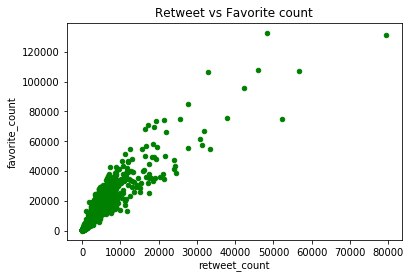

In [94]:
# Visulize retweet againt favorite count

df.plot(x='retweet_count', y= 'favorite_count', kind = 'scatter', color='green')
plt.title('Retweet vs Favorite count');

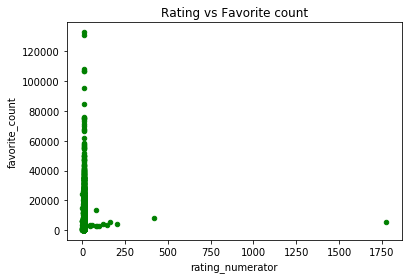

In [95]:
#Visualize rating against favorite count

df.plot(x='rating_numerator', y= 'favorite_count', kind = 'scatter', color='green')
plt.title('Rating vs Favorite count');

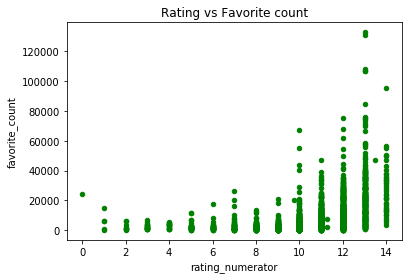

In [96]:
#Visualize rating against favorite count of data without outliers

df1.plot(x='rating_numerator', y= 'favorite_count', kind = 'scatter', color='green')
plt.title('Rating vs Favorite count');
